### CLUSTERING

We will reuse the Breast_Cancer_Data.csv in previous exercise to cluster the patients

In [3]:
import pandas as pd
import os
os.environ["OMP_NUM_THREADS"] = "3"  # Adjust "3" based on the number of threads you want to use

In [5]:
data=pd.read_csv("Breast_Cancer_Data.csv")

### TASK 1
Since the previous exercise we have identified two top features to determine the diagnosis result, we will reuse these features for clustering. Purpose of using only these features is to help in visualizing the cluster later. Before that, keep the diagnosis result separately for further validation. 
The feature are:

* 'concave points_worst'
* 'perimeter_worst'

### TASK 2
* Scale the data using MinMaxScaler()
* Save the scaled data in DataFrame for easier plotting.
* Plot Scatter of the data

### TASK 3
* From range of 1 to 5, iterate to train the KMeans Cluster using the scaled data 
* Plot the elbow graph based on trained KMeans
* Find most optimal cluster by examining the elbow graph

### TASK 4
* Create a KMeans Cluster with the optimal cluster number
* Convert the scaled data to numpy train the KMeans with scaled data
* Predict cluster of the scaled data

### TASK 5
* Plot the predicted samples by their cluster together with the centroids
* Plot the actual sample based on diagnosis to compare. 
* Your previous cluster number might be larger than the actual classes (Malignant and Benign). Try to train KMeans with only two cluster and plot its prediction 

In [12]:
# TASK 1: Extract the necessary features and keep the diagnosis result separately
features = ['concave points_worst', 'perimeter_worst']
X = data[features]
diagnosis = data['diagnosis']  # Keep the diagnosis for validation

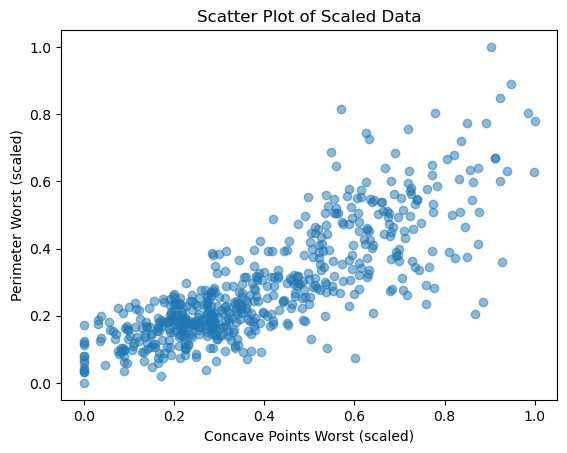

In [14]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# TASK 2: Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Plot scatter of the scaled data
plt.scatter(X_scaled_df['concave points_worst'], X_scaled_df['perimeter_worst'], alpha=0.5)
plt.title('Scatter Plot of Scaled Data')
plt.xlabel('Concave Points Worst (scaled)')
plt.ylabel('Perimeter Worst (scaled)')
plt.show()

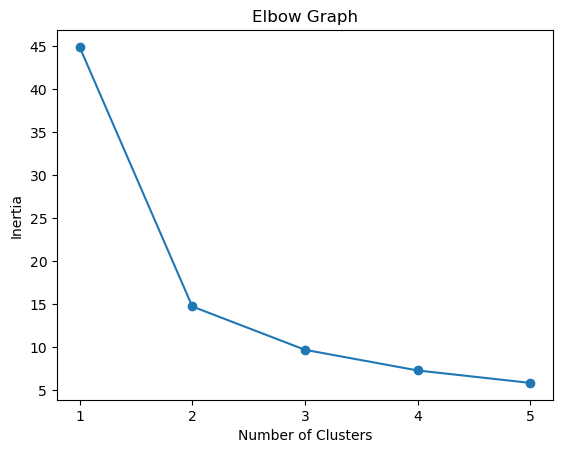

In [16]:
from sklearn.cluster import KMeans
# TASK 3: Find optimal cluster number using the elbow method
inertia = []
k_range = range(1, 6)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

# Based on the elbow graph, determine the optimal number of clusters
optimal_clusters = 2  # Assume 2 for simplicity, update based on the elbow graph


In [18]:
# TASK 4: Train KMeans with the optimal cluster number and predict clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_scaled)
clusters = kmeans_optimal.predict(X_scaled)

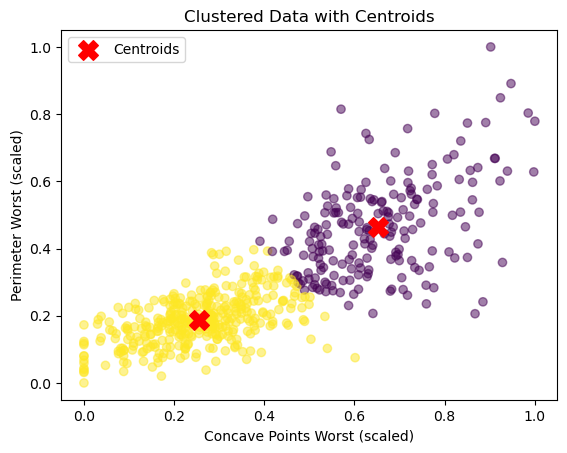

In [20]:
# TASK 5: Plot predicted samples by their clusters with centroids
centroids = kmeans_optimal.cluster_centers_
plt.scatter(X_scaled_df['concave points_worst'], X_scaled_df['perimeter_worst'], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Clustered Data with Centroids')
plt.xlabel('Concave Points Worst (scaled)')
plt.ylabel('Perimeter Worst (scaled)')
plt.legend()
plt.show()

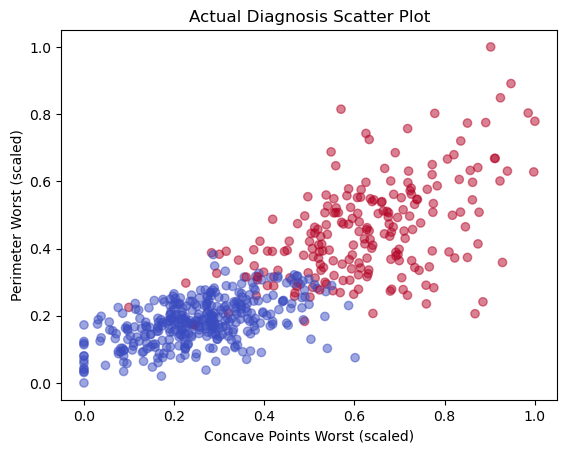

In [22]:
# Compare with the actual classes (Malignant and Benign)
# Map diagnosis to integers for comparison
diagnosis_mapped = diagnosis.map({'M': 1, 'B': 0})  # Malignant: 1, Benign: 0
plt.scatter(X_scaled_df['concave points_worst'], X_scaled_df['perimeter_worst'], c=diagnosis_mapped, cmap='coolwarm', alpha=0.5)
plt.title('Actual Diagnosis Scatter Plot')
plt.xlabel('Concave Points Worst (scaled)')
plt.ylabel('Perimeter Worst (scaled)')
plt.show()

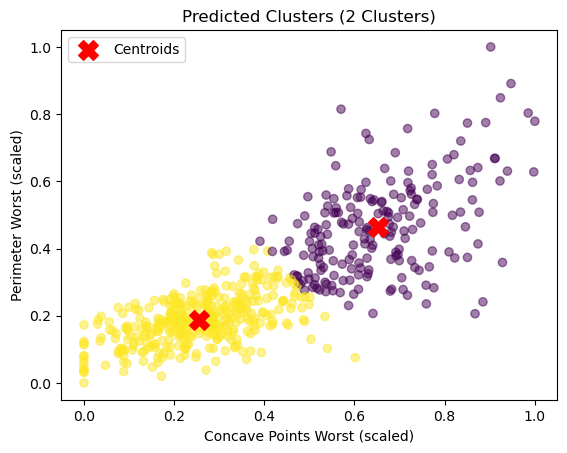

In [24]:
# Train KMeans with only 2 clusters
kmeans_two_clusters = KMeans(n_clusters=2, random_state=42)
kmeans_two_clusters.fit(X_scaled)
clusters_two = kmeans_two_clusters.predict(X_scaled)

# Plot predictions with 2 clusters
plt.scatter(X_scaled_df['concave points_worst'], X_scaled_df['perimeter_worst'], c=clusters_two, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_two_clusters.cluster_centers_[:, 0], kmeans_two_clusters.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Predicted Clusters (2 Clusters)')
plt.xlabel('Concave Points Worst (scaled)')
plt.ylabel('Perimeter Worst (scaled)')
plt.legend()
plt.show()